In [ ]:


import numpy as np 
import pandas as pd 



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras 
from tqdm import tqdm
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix , accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [3]:

image_data='/kaggle/input/dangerous-insects-dataset/farm_insects'
pd.DataFrame(os.listdir(image_data),columns=['Files_Name'])

Files_Name
0                          Citrus Canker
1                Colorado Potato Beetles
2                         Fall Armyworms
3                        Cabbage Loopers
4                           Spider Mites
5                            Corn Borers
6            Brown Marmorated Stink Bugs
7                          Corn Earworms
8                                 Thrips
9                 Western Corn Rootworms
10                      Tomato Hornworms
11                             Armyworms
12  Africanized Honey Bees (Killer Bees)
13                           Fruit Flies
14                                Aphids

In [4]:
train_data_dir =image_data
batch_size = 32
target_size = (224,224)
validation_split = 0.2
train= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="training",
    seed=100,
    image_size=target_size,
    batch_size=batch_size,
)
validation= tf.keras.preprocessing.image_dataset_from_directory(
    train_data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=200,
    image_size=target_size,
    batch_size=batch_size,
)

Found 1591 files belonging to 15 classes.
Using 1273 files for training.
Found 1591 files belonging to 15 classes.
Using 318 files for validation.


In [5]:
class_names = train.class_names
class_names

['Africanized Honey Bees (Killer Bees)',
 'Aphids',
 'Armyworms',
 'Brown Marmorated Stink Bugs',
 'Cabbage Loopers',
 'Citrus Canker',
 'Colorado Potato Beetles',
 'Corn Borers',
 'Corn Earworms',
 'Fall Armyworms',
 'Fruit Flies',
 'Spider Mites',
 'Thrips',
 'Tomato Hornworms',
 'Western Corn Rootworms']

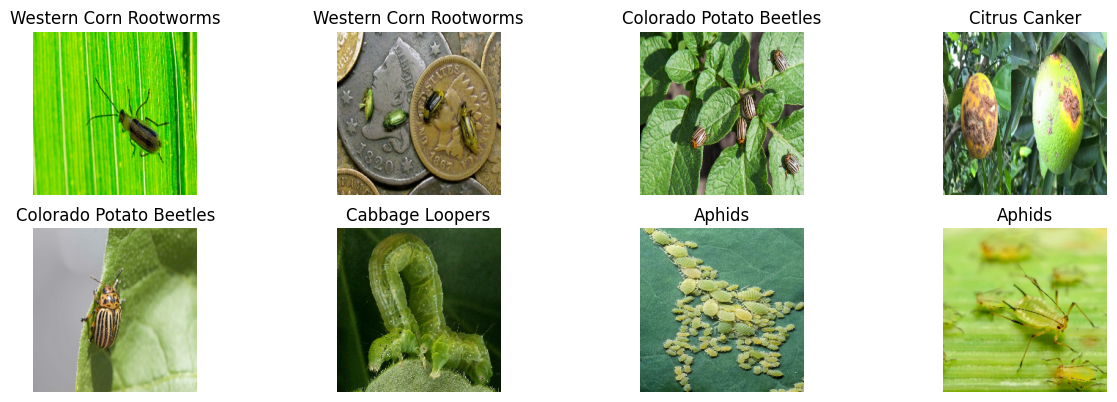

In [6]:
plt.figure(figsize=(15, 20))
for images, labels in train.take(1):
    for i in range(8):
        ax = plt.subplot(8, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
base_model = tf.keras.applications.MobileNetV3Small(input_shape=(224,224,3),include_top=False,weights='imagenet')

4334752/4334752 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
base_model = keras.applications.MobileNetV3Small(input_shape=(224, 224, 3),
                                                 include_top=False,
                                                 weights='imagenet')
base_model.trainable = False


In [10]:
keras_model = keras.models.Sequential()
keras_model.add(keras.Input(shape=(224, 224, 3)))
keras_model.add(base_model)
keras_model.add(keras.layers.Flatten())
keras_model.add(keras.layers.Dropout(0.5))
keras_model.add(keras.layers.Dense(15, activation=tf.nn.softmax))


In [11]:
keras_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobilenetV3small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28224)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │       423,375 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,362,495 (5.20 MB)

 Trainable params: 423,375 (1.62 MB)

 Non-trainable params: 939,120 (3.58 MB)

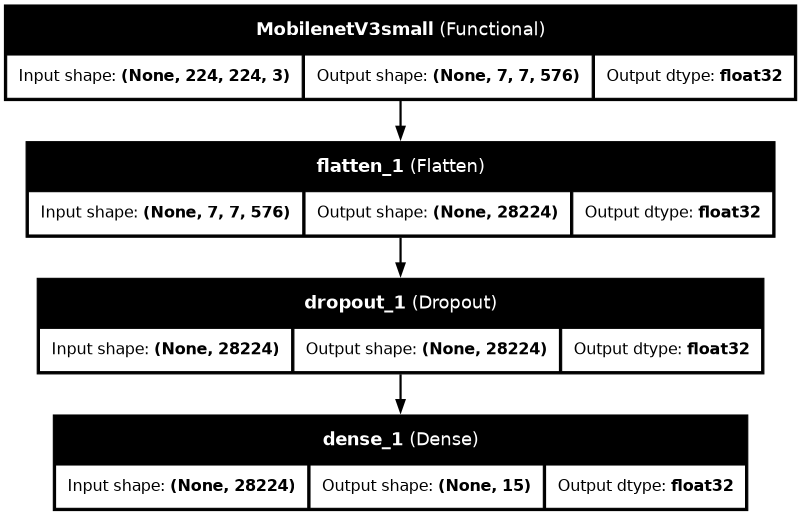

In [12]:

tf.keras.utils.plot_model(keras_model, 
                          to_file='model.png', 
                          show_shapes=True, 
                          show_layer_names=True, 
                          show_dtype=True, 
                          dpi=80)

In [13]:

keras_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [16]:
early_stopping =EarlyStopping(patience=5, restore_best_weights=True)

In [21]:
keras_model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist=keras_model.fit(train,epochs=10,validation_data=validation,callbacks=[early_stopping])

Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 24s 446ms/step - accuracy: 0.2893 - loss: 5.7645 - val_accuracy: 0.8396 - val_loss: 0.8831
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 383ms/step - accuracy: 0.8969 - loss: 0.6906 - val_accuracy: 0.8962 - val_loss: 0.9668
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 21s 390ms/step - accuracy: 0.9313 - loss: 0.5414 - val_accuracy: 0.9151 - val_loss: 0.7273
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 381ms/step - accuracy: 0.9460 - loss: 0.3309 - val_accuracy: 0.9025 - val_loss: 0.8120
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 387ms/step - accuracy: 0.9515 - loss: 0.4328 - val_accuracy: 0.9245 - val_loss: 0.8285
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 373ms/step - accuracy: 0.9584 - loss: 0.2948 - val_accuracy: 0.9245 - val_loss: 0.9651
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 16s 389ms/step - accuracy: 0.9655 - loss: 0.5772 - val_accuracy: 0.9245 - val_loss: 0.8596
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 15s 377ms/step - accuracy: 0.9604 - loss: 0.3344 - val_accu

In [22]:
hist_=pd.DataFrame(hist.history)
hist_

accuracy      loss  val_accuracy  val_loss
0  0.393559  4.942682      0.839623  0.883100
1  0.871170  0.918165      0.896226  0.966847
2  0.929301  0.627973      0.915094  0.727311
3  0.937942  0.423328      0.902516  0.811983
4  0.952867  0.524469      0.924528  0.828459
5  0.956795  0.359976      0.924528  0.965079
6  0.959937  0.583961      0.924528  0.859582
7  0.947368  0.529859      0.921384  1.027909

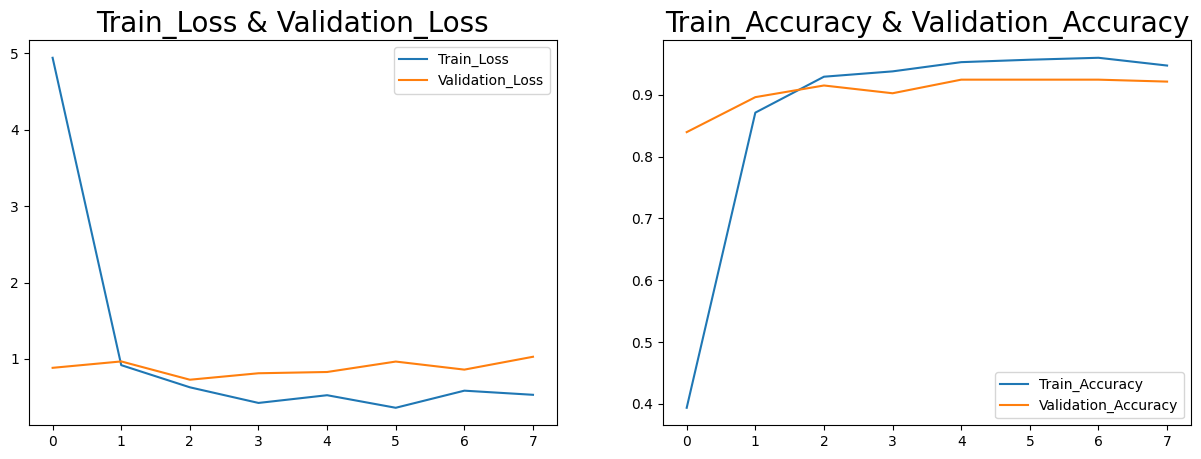

In [23]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(hist_['loss'],label='Train_Loss')
plt.plot(hist_['val_loss'],label='Validation_Loss')
plt.title('Train_Loss & Validation_Loss',fontsize=20)
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist_['accuracy'],label='Train_Accuracy')
plt.plot(hist_['val_accuracy'],label='Validation_Accuracy')
plt.title('Train_Accuracy & Validation_Accuracy',fontsize=20)
plt.legend()

In [24]:
X_val,y_val,y_pred=[],[],[]
for images, labels in validation:
    y_val.extend(labels.numpy())
    X_val.extend(images.numpy())
predictions=keras_model.predict(np.array(X_val))
for i in predictions:
    y_pred.append(np.argmax(i))
df=pd.DataFrame()
df['Actual'],df['Prediction']=y_val,y_pred
df

10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 311ms/step


Actual  Prediction
0         9           9
1        14          14
2        11          11
3         7           7
4        11          11
..      ...         ...
313       4           4
314       9           9
315       1           1
316       2           2
317       2           9

[318 rows x 2 columns]

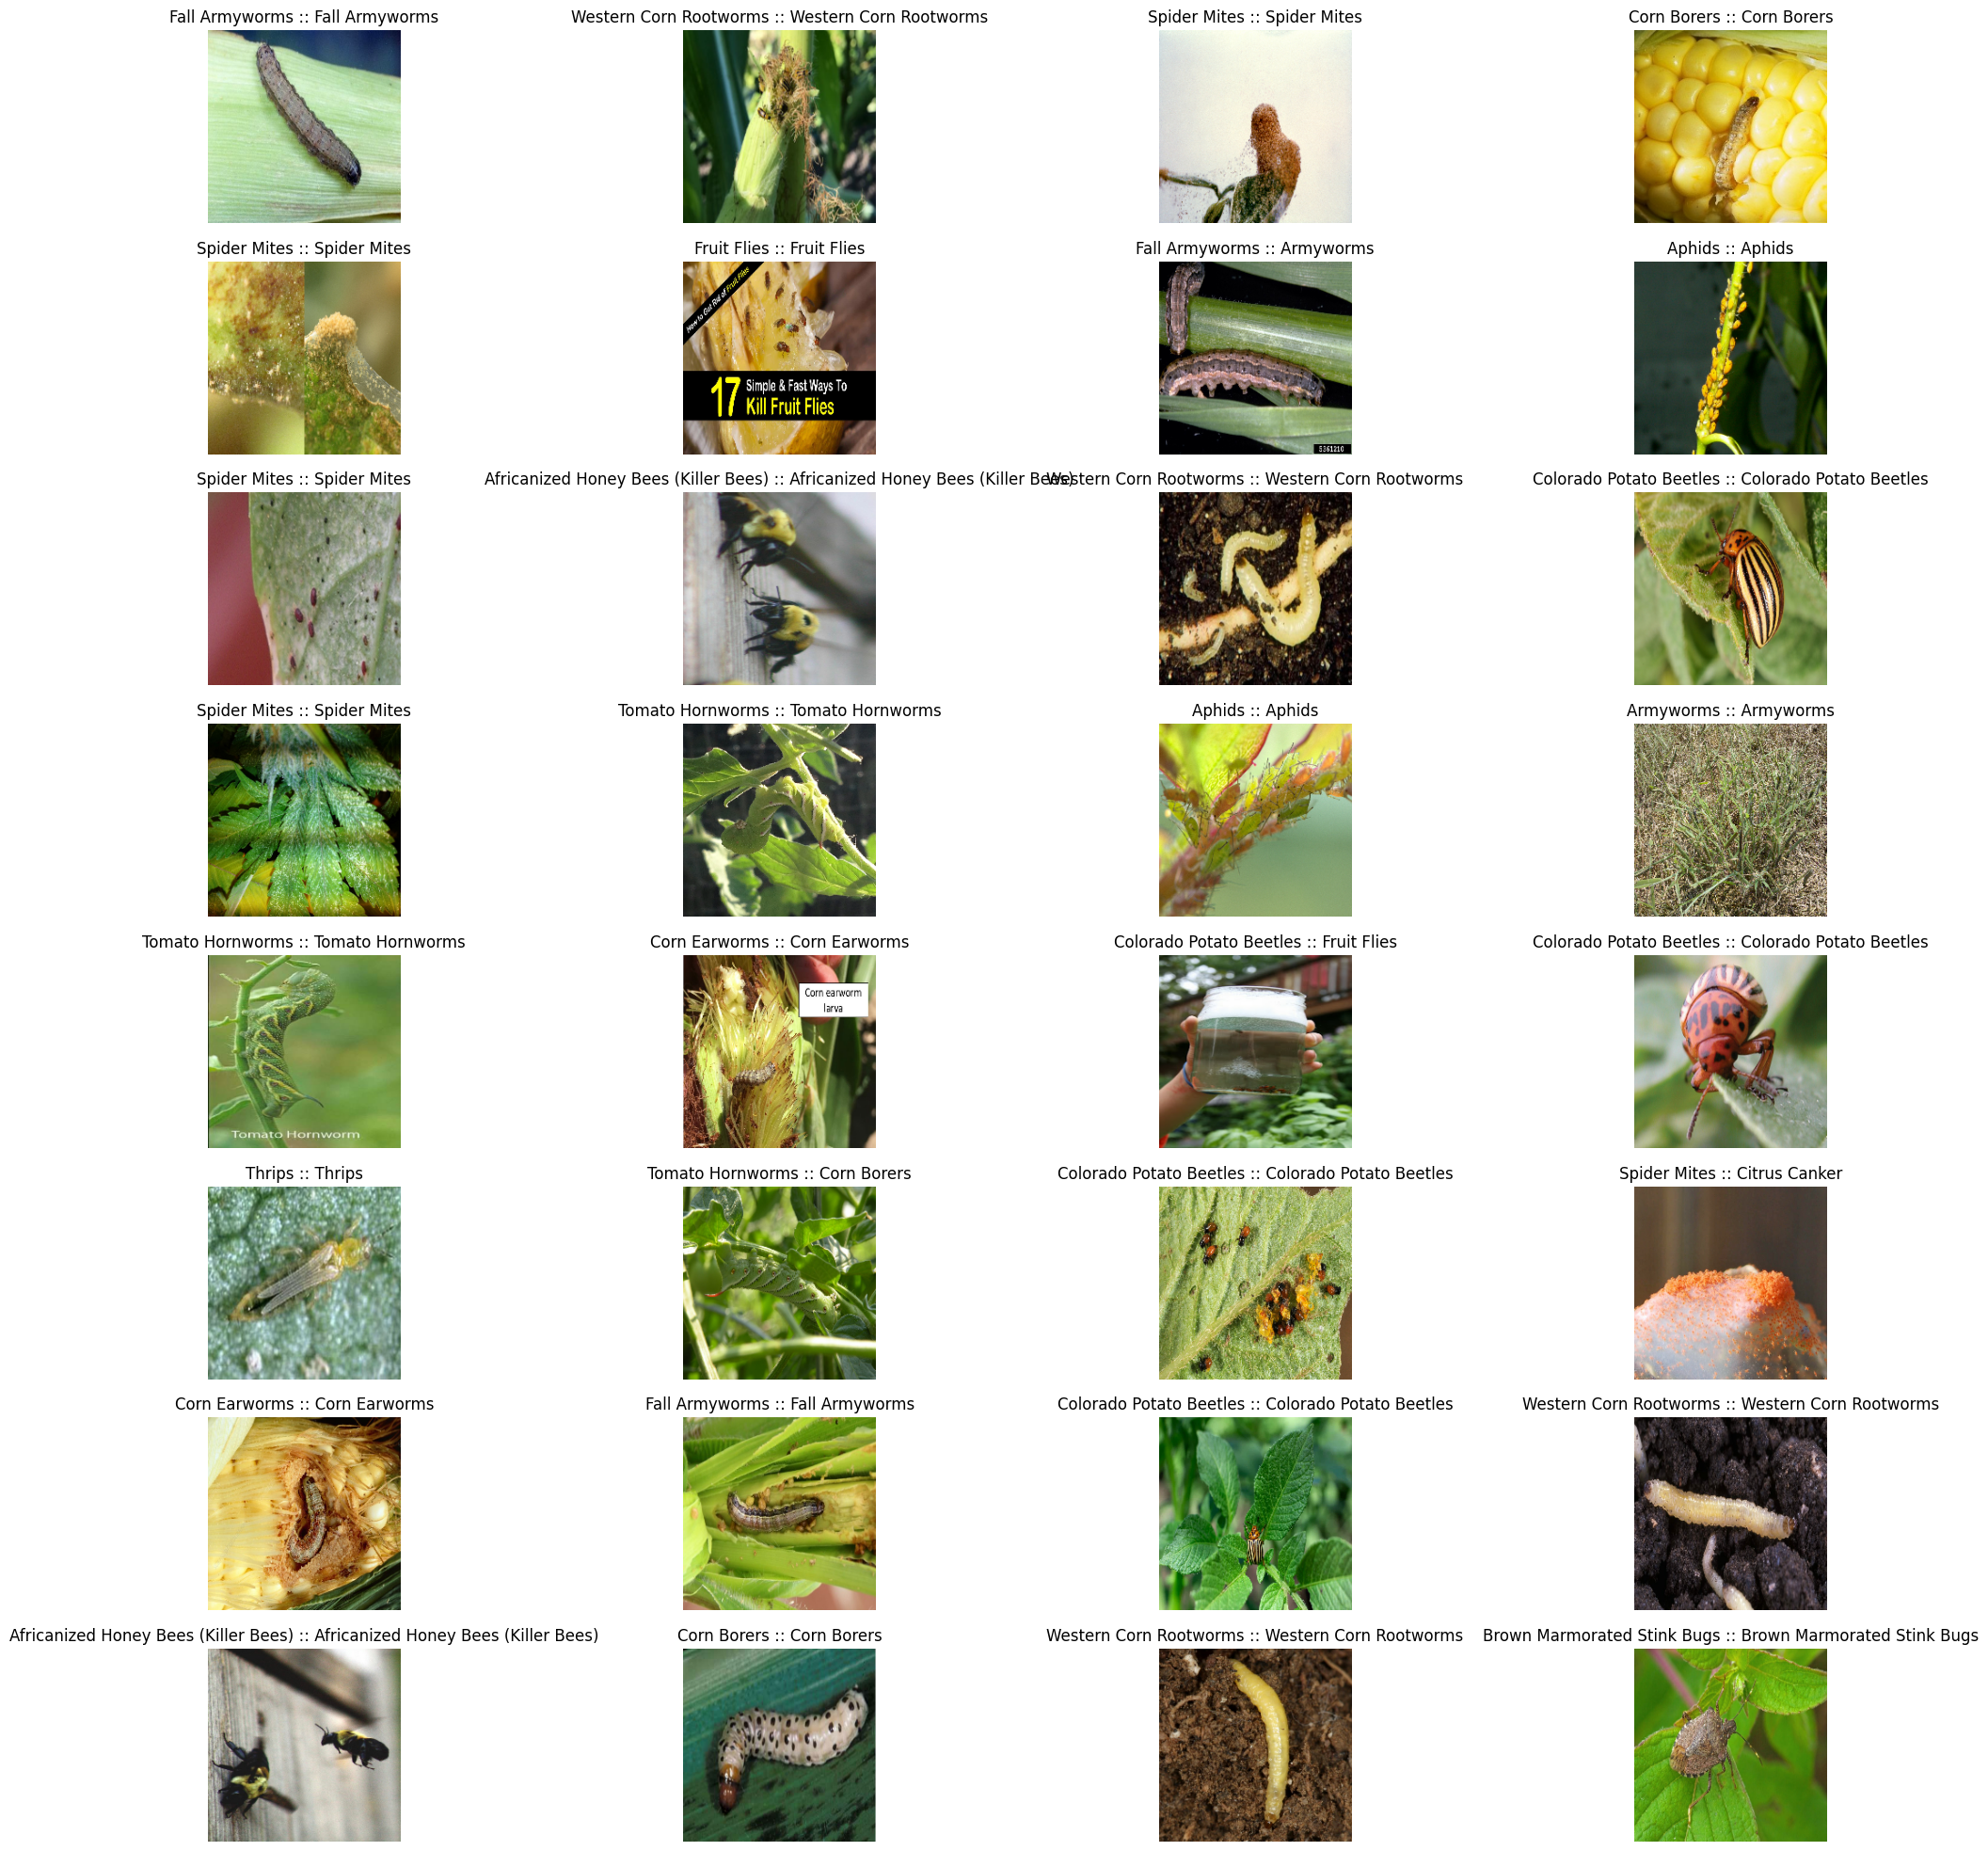

In [25]:
plt.figure(figsize=(25,25))
for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(X_val[i].astype("uint8"))
    plt.title(f'{class_names[y_val[i]]} :: {class_names[y_pred[i]]}')
    plt.axis("off")

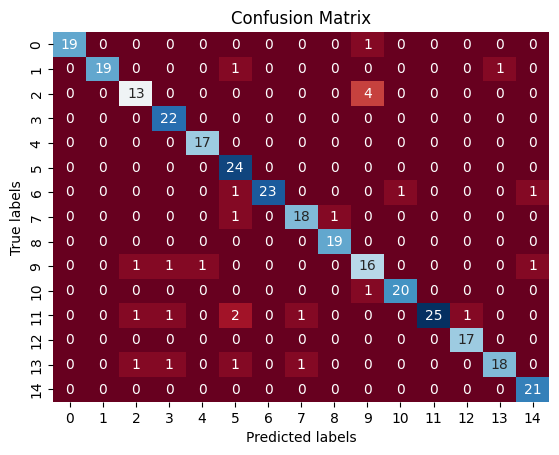

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0, 13,  0,  0,  0,  0,  0,  0,  4,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 22,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 24,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 23,  0,  0,  0,  1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  1,  0, 18,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 19,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  1,  0,  0,  0,  0, 16,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1, 20,  0,  0,  0,  0],
       [ 0,  0,  1,  1,  0,  2,  0,  1,  0,  0,  0, 25,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  1,  1,  0,  1,  0,  1,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0

In [26]:
ax= plt.subplot()
CM = confusion_matrix(y_val,y_pred)
sns.heatmap(CM, annot=True, fmt='g', ax=ax,cbar=False,cmap='RdBu')
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
plt.show()
CM

In [27]:
Acc = accuracy_score(y_val,y_pred)
print("accuracy is: {0:.3f}%".format(Acc * 100))

accuracy is: 91.509%
